## Approximate Distributions Implied by Importance Sampling

This post recaps the theory of importance sampling, and shows how to derive the implied distribution conditioned on the previous samples. This approach is used in [Reinterpreting Importance-Weighted Autoencoders](https://arxiv.org/pdf/1704.02916.pdf).

# Recap of Importance Sampling

Lets say we want to compute:

$E_{p(x)}[f(x)]$

However, $p(z)$ is some arbitary distribution which we can evaluate but not sample from. We can use a proposal distribution which is nice to sample from. Let's call this distribution $q(z)$.

$E_{p(x)}[f(x)] = \int p(x) f(x) dx = \int \frac{p(x)}{q(x)}q(x) f(x) dx = E_{q(x)}[\frac{p(x)}{q(x)} f(x)]$

Write $\frac{p(x)}{q(x)}$ as $r$:

$E_{p(x)}[f(x)] = E_{q(x)}[r \cdot f(x)]$

If we say that each distribution has a normalisation constant, so: $q(x) = \frac{\tilde{q}(x)}{Z_{q}}$ and $p(x) = \frac{\tilde{p}(x)}{Z_{p}}$

$E_{p(x)}[f(x)] = \int p(x) f(x) dx = \int \frac{p(x)}{q(x)}q(x) f(x) dx = \frac{Z_{q}}{Z_{p}}\int \frac{\tilde{p}(x)}{\tilde{q}(x)}q(x) f(x) dx$

Using the basic axiom of probability we know:

$Z_{p} = \int  \tilde{p}(x) dx$

And so

$\frac{Z_{p}}{Z_{q}} = \int \frac{\tilde{p}(x)}{\tilde{q}(x)}q(x) dx$

We can approximate these integrals with sums over samples drawn from $q$.

$\frac{Z_{p}}{Z_{q}} \approx \frac{1}{L} \sum_{l=1}^{L} r_{l} $ 

where $r_{l} = \frac{\tilde{p}(x_{l})}{\tilde{q}(x_{l})}$, and $x_{l}$ is a sample drawn from $q$.

$E_{p(x)}[f(x)] = \frac{Z_{q}}{Z_{p}}\int \frac{\tilde{p}(x)}{\tilde{q}(x)}q(x) f(x) dx \approx \frac{Z_{q}}{Z_{p}} \sum_{l=1}^{L} r_{l} f(x_{l}) $

Putting this together we get:

$E_{p(x)}[f(x)] \approx \frac{\sum_{l=1}^{L} r_{l} \ f(x_{l})}{\sum_{l=1}^{L} r_{l}}$

## Why is this important?

If we have some arbitary combination of distributions, we can normally evaluate it proportionally, but computing the normalization constant can be somewhat trickier. This result means we don't need to. We just need to keep track of our samples, and the weights account for the observations so far, so as to converge towards the true distribution.

[Reinterpreting Importance-Weighted Autoencoders](https://arxiv.org/pdf/1704.02916.pdf) then extends this slightly to show the implicit distribution that this sampling procedure produces, given L previous samples:

$\hat{p}(x^{*} \mid x_{1},..,x_{L}) = \frac{ r_{l^{*}} }{\frac{1}{L}(\sum_{l=1}^{L} r_{l}) + r_{l^{*}}} q(x^{*})$

This is an unnormalized form, so below I do an empirical normalization for ease of scaling. This is a neat little result because it helps us visualise the convergence of importance sampling, and the connections to the earlier derivation are fairly plain. We just need to consider the special case of $f$ as a delta or indicator function, and then the result is obvious. $I$(x) is a point mass at x (with integral 1), and 0 everywhere else. 

$E_{p(x)}[I(x^{*})] = p(x^{*}\mid x_{1},..,x_{L}) = \frac{Z_{p}}{Z_{q}}\int \frac{\tilde{p}(x)}{\tilde{q}(x)}q(x) I(x^{*}) dx = \frac{Z_{p}}{Z_{q}} \frac{\tilde{p}(x^{*})}{\tilde{q}(x^{*})}q(x^{*}) \approx \frac{Z_{p}}{Z_{q}} r_{l^{*}} q(x^{*}) $

Substituting in the formula for the normalisation constant ratio gives the final form above.

In [1]:
import numpy as np
from scipy.stats import norm, uniform, cauchy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def approx_dist(p,q, samples, plot_range):


    pq = p.pdf(samples)/q.pdf(samples)

    w = np.sum(pq)

    n = p.pdf(plot_range)/q.pdf(plot_range)

    ans = p.pdf(plot_range) / ((n+w)/(len(samples)+1))
    ans /= ans.sum()*res
    return ans

p = norm()
q = cauchy()
res = .01
y = np.arange(-5,5, res)

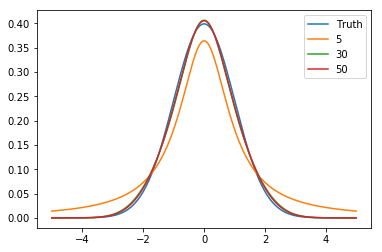

In [3]:
plt.figure()
plt.plot(y, p.pdf(y), label="Truth")
for i in [5,30,50]:
    s = np.random.uniform(-50,50,size=i)
    plt.plot(y, approx_dist(p,q, s, y), label=str(i))
    
plt.legend()

This shows how the more samples we draw, the more the distribution converges on the truth. We can show this for a more complex example quite naturally.

In [4]:
def complex_dist(p,q, samples, plot_range):


    pq = p(samples)/q.pdf(samples)

    w = np.sum(pq)

    n = p(plot_range)/q.pdf(plot_range)

    ans = p(plot_range) / ((n+w)/(len(samples)+1))
    ans /= ans.sum()*res
    return ans

p = lambda x: norm.pdf(x, 3, .5)*0.5 + cauchy.pdf(x)*0.5
q = cauchy()
res = .01
y = np.arange(-5,5, res)

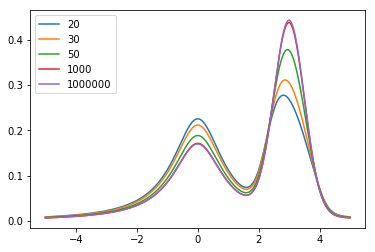

In [5]:
plt.figure()
for i in [20,30,50, 1000, 1000000]:
    s = np.random.uniform(-50,50,size=i)
    plt.plot(y, complex_dist(p,q, s, y), label=str(i))
    
plt.legend()

# Summary

This post covered the approximate distributions implied by Importance Sampling. As the number of samples increase, this distribution tends towards the true distribution we are attempting to sample from - all without needing the normalization constants for the target distribution.